In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

Loading the data

In [2]:
data = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
pd.set_option('display.max_columns', None)

Data Exploration

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [6]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


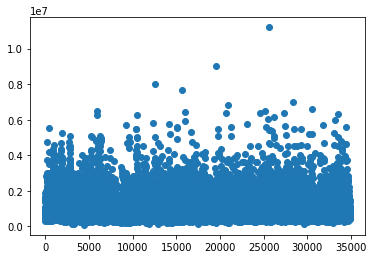

In [7]:
plt.scatter(data['Price'].index, data['Price'])

Text(0.5,1,'Distanz vs Preis')

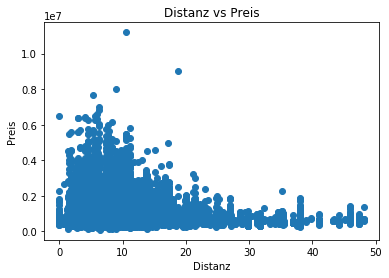

In [8]:
plt.scatter(data['Distance'], data['Price'])
plt.xlabel('Distanz')
plt.ylabel('Preis')
plt.title('Distanz vs Preis')
#plt.savefig('C:/Users/js5409s/Google Drive/Bachelorarbeit/Bilder/distance_vs_price.pdf', dpi=600)

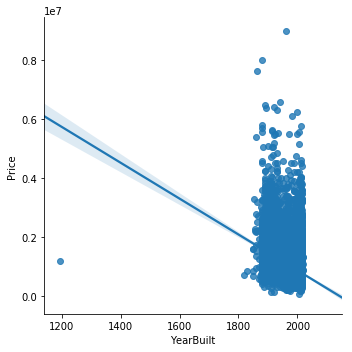

In [9]:
sns.lmplot(data=data, x='YearBuilt', y='Price')

In [10]:
data = data.drop(data[data['YearBuilt']  == data['YearBuilt'].min()].index, axis=0)

In [11]:
data['YearBuilt'].min()

1800.0

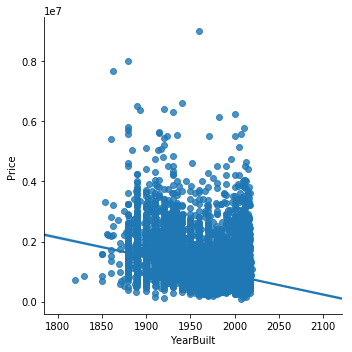

In [12]:
sns.lmplot(data=data, x='YearBuilt', y='Price')

In [13]:
from sklearn.model_selection import train_test_split
data_clear = data.dropna()
X = data_clear.drop(['Price'], axis=1)
y = data_clear['Price']

# transform categorical variables to numerical variables
le = LabelEncoder()
X['Suburb'] = le.fit_transform(X['Suburb'])
X['Address'] = le.fit_transform(X['Address'])
X['Regionname'] = le.fit_transform([str(rn) for rn in X['Regionname']])
X['CouncilArea'] = le.fit_transform([str(ca) for ca in X['CouncilArea']])
X['SellerG'] = le.fit_transform(X['SellerG'])
X['Type'] = le.fit_transform(X['Type'])
X['Method'] = le.fit_transform(X['Method'])
X['Date'] = [int(d.split('/')[2]) for d in X['Date']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [15]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
R2 = metrics.r2_score(y_test, lin_reg_pred)
n = len(y_test)
p = X_test.shape[1] - 1
print('Adj-R2:', 1-(1-R2)*(n-1)/(n-p-1))

Adj-R2: 0.612805851546


In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
decision_tree_pred = regressor.predict(X_test)
R2 = metrics.r2_score(y_test, decision_tree_pred)
n = len(y_test)
p = X_test.shape[1] - 1
print('Adj-R2:', 1-(1-R2)*(n-1)/(n-p-1))

Adj-R2: 0.58827152626


In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=2, random_state=0)
regressor.fit(X_train, y_train)
random_forest_pred = regressor.predict(X_test)
R2 = metrics.r2_score(y_test, random_forest_pred)
n = len(y_test)
p = X_test.shape[1] - 1
print('Adj-R2:', 1-(1-R2)*(n-1)/(n-p-1))

Adj-R2: 0.670614978151


In [18]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
random_forest_100_pred = regressor.predict(X_test)
R2 = metrics.r2_score(y_test, random_forest_100_pred)
n = len(y_test)
p = X_test.shape[1] - 1
print('Adj-R2:', 1-(1-R2)*(n-1)/(n-p-1))

Adj-R2: 0.774050173348


Text(0,0.5,'Predicted Price')

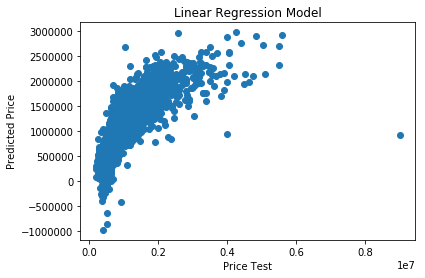

In [19]:
plt.scatter(y_test, lin_reg_pred)
plt.title('Linear Regression Model')
plt.xlabel('Price Test')
plt.ylabel('Predicted Price')

Text(0,0.5,'Predicted Price')

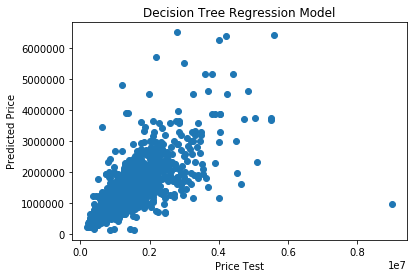

In [20]:
plt.scatter(y_test, decision_tree_pred)
plt.title('Decision Tree Regression Model')
plt.xlabel('Price Test')
plt.ylabel('Predicted Price')

Text(0,0.5,'Predicted Price')

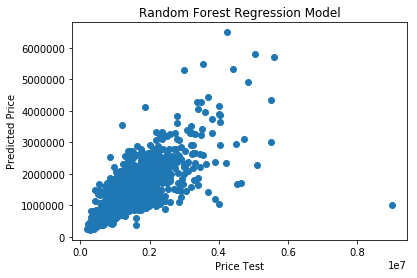

In [21]:
plt.scatter(y_test, random_forest_pred)
plt.title('Random Forest Regression Model')
plt.xlabel('Price Test')
plt.ylabel('Predicted Price')

Saving the data

In [23]:
pd.DataFrame(decision_tree_pred).to_csv('noprep_pred.csv', sep=',', encoding='utf-8', index=None)
pd.DataFrame(y_test).to_csv('noprep_test.csv', sep=',', encoding='utf-8', index=None)